In [28]:
# Here we import all the essential libraries needed for our data processing, analysis, visualization, 
# and modeling. We also load our dataset from the provided Kaggle input path.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

# Define the path to the dataset (this is the folder path on Kaggle)
data_path = '/kaggle/input/bdhsc-scc-2025-synth-data/BDHSC_SCC_2025_synth_data.csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(data_path)

# Let's quickly inspect the data to understand its shape and structure.
print("Data Shape:", df.shape)
print(df.head())
print(df.info())

Data Shape: (11234160, 15)
                    ID  Month  Gender  Ethnic  Base_Drug_Combo  Comp_INI  \
0  8130128040812561626      0       1       3                0         0   
1  8130128040812561626      1       1       3                0         0   
2  8130128040812561626      2       1       3                0         0   
3  8130128040812561626      3       1       3                0         0   
4  8130128040812561626      4       1       3                0         0   

   Comp_NNRTI  ExtraPI  ExtraPk_En  VL_M  CD4_M  Drug_M         VL        CD4  \
0           3        5           0     0      1       1  29.944271  793.45830   
1           3        5           0     0      0       1  29.241980  467.41890   
2           3        5           0     0      0       1  28.748991  465.12485   
3           3        5           0     0      0       1  28.101835  692.00690   
4           3        5           0     0      0       1  28.813837  641.75714   

      RelCD4  
0  30.834505  

In [29]:
# In this cell, we map the coded categorical variables into meaningful text values using the data dictionary.
# This makes the dataset more interpretable and easier to analyze.

# Mapping dictionary for the 'Base_Drug_Combo' column:
base_drug_mapping = {
    0: "FTCa + TDFb",
    1: "3TCc + ABCd",
    2: "FTC + TAFe",
    3: "DRVf + FTC + TDF",
    4: "FTC + RTVBg + TDF",
    5: "Other"
}

# Mapping for Complementary Integrase Inhibitor ('Comp_INI')
comp_ini_mapping = {
    0: "DTGh",
    1: "RALi",
    2: "EVGj",
    3: "Not applied"
}

# Mapping for Complementary NNRTI ('Comp_NNRTI')
comp_nnrt_mapping = {
    0: "NVPk",
    1: "EFVl",
    2: "RPVm",
    3: "Not applied"
}

# Mapping for Extra Protease Inhibitor ('ExtraPI')
extra_pi_mapping = {
    0: "DRV",
    1: "RTVB",
    2: "LPVn",
    3: "RTVo",
    4: "ATVp",
    5: "Not applied"
}

# Mapping for Extra Pharmacokinetic Enhancer ('ExtraPk_En') - it's binary.
extra_pk_mapping = {
    0: "False",
    1: "True"
}

# Mapping for Gender (1: Male, 2: Female)
gender_mapping = {1: "Male", 2: "Female"}

# Mapping for Ethnicity (1: Asian, 2: Black, 3: White, 4: Other)
ethnic_mapping = {1: "Asian", 2: "Black", 3: "White", 4: "Other"}

# Now, we apply these mappings to the corresponding columns in our DataFrame.
df['Base_Drug_Combo'] = df['Base_Drug_Combo'].map(base_drug_mapping)
df['Comp_INI'] = df['Comp_INI'].map(comp_ini_mapping)
df['Comp_NNRTI'] = df['Comp_NNRTI'].map(comp_nnrt_mapping)
df['ExtraPI'] = df['ExtraPI'].map(extra_pi_mapping)
df['ExtraPk_En'] = df['ExtraPk_En'].map(extra_pk_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
df['Ethnic'] = df['Ethnic'].map(ethnic_mapping)

# Let's look at the updated DataFrame to ensure the mapping worked correctly.
print(df.head())

                    ID  Month Gender Ethnic Base_Drug_Combo Comp_INI  \
0  8130128040812561626      0   Male  White     FTCa + TDFb     DTGh   
1  8130128040812561626      1   Male  White     FTCa + TDFb     DTGh   
2  8130128040812561626      2   Male  White     FTCa + TDFb     DTGh   
3  8130128040812561626      3   Male  White     FTCa + TDFb     DTGh   
4  8130128040812561626      4   Male  White     FTCa + TDFb     DTGh   

    Comp_NNRTI      ExtraPI ExtraPk_En  VL_M  CD4_M  Drug_M         VL  \
0  Not applied  Not applied      False     0      1       1  29.944271   
1  Not applied  Not applied      False     0      0       1  29.241980   
2  Not applied  Not applied      False     0      0       1  28.748991   
3  Not applied  Not applied      False     0      0       1  28.101835   
4  Not applied  Not applied      False     0      0       1  28.813837   

         CD4     RelCD4  
0  793.45830  30.834505  
1  467.41890  30.355980  
2  465.12485  30.405320  
3  692.00690  30.2

In [30]:
# Here we combine the various drug-related columns into a single 'Regimen' column.
# This column will uniquely identify the treatment regimen for each record.

df['Regimen'] = (
    df['Base_Drug_Combo'] + " | " +
    df['Comp_INI'] + " | " +
    df['Comp_NNRTI'] + " | " +
    df['ExtraPI'] + " | " +
    df['ExtraPk_En']
)

# Let's see how many unique regimens we have and inspect a few rows.
print("Unique Regimens:", df['Regimen'].nunique())
print(df[['ID', 'Month', 'Regimen']].head())

Unique Regimens: 135
                    ID  Month  \
0  8130128040812561626      0   
1  8130128040812561626      1   
2  8130128040812561626      2   
3  8130128040812561626      3   
4  8130128040812561626      4   

                                             Regimen  
0  FTCa + TDFb | DTGh | Not applied | Not applied...  
1  FTCa + TDFb | DTGh | Not applied | Not applied...  
2  FTCa + TDFb | DTGh | Not applied | Not applied...  
3  FTCa + TDFb | DTGh | Not applied | Not applied...  
4  FTCa + TDFb | DTGh | Not applied | Not applied...  


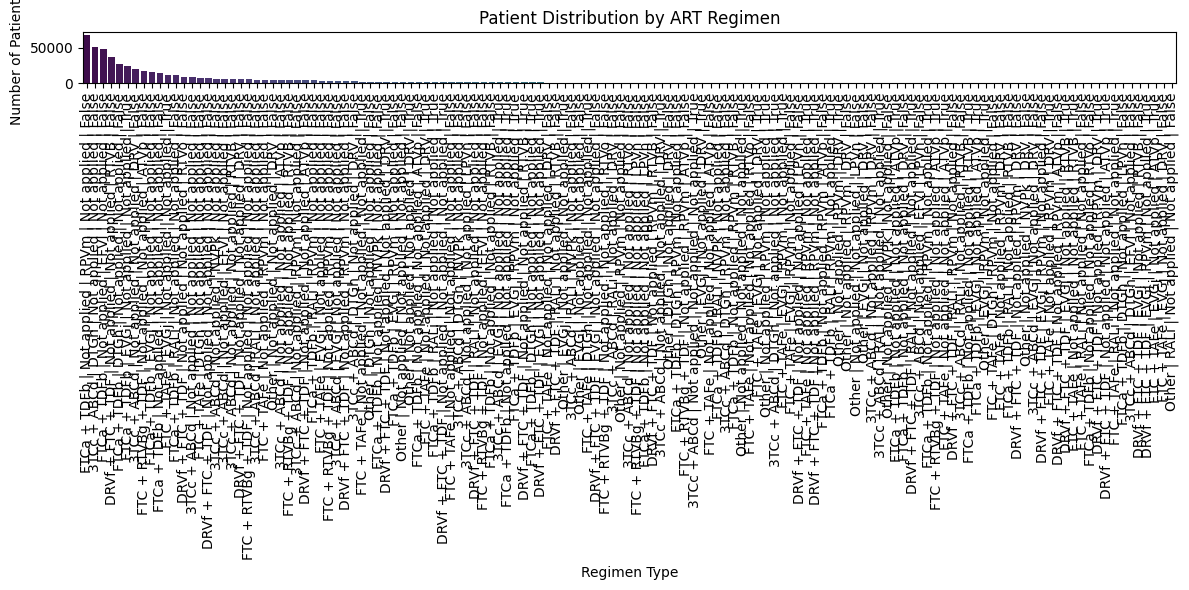

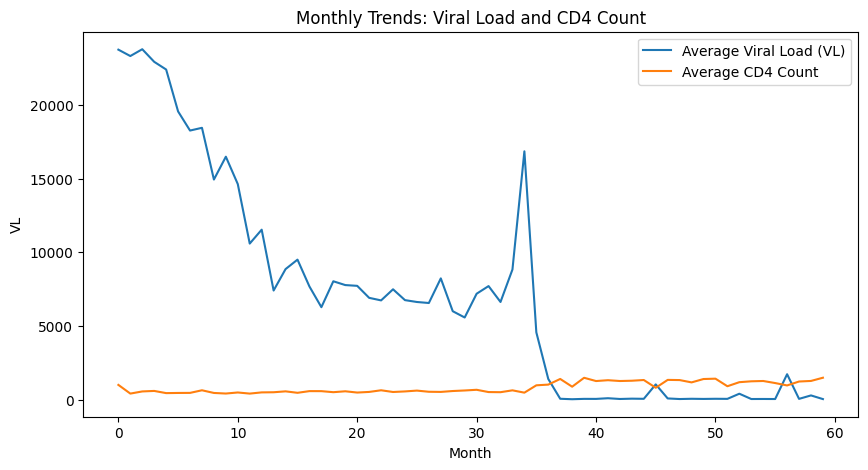

In [31]:
# In this cell, we perform some exploratory data analysis.
# We look at the distribution of patients across different regimens and examine trends over time for Viral Load (VL) and CD4 counts.

# First, let's aggregate and plot the number of unique patients per regimen.
regimen_counts = df.groupby('Regimen')['ID'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=regimen_counts.index, y=regimen_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Regimen Type")
plt.ylabel("Number of Patients")
plt.title("Patient Distribution by ART Regimen")
plt.tight_layout()
plt.show()

# Next, we plot the average monthly trends for Viral Load (VL) and CD4 count.
monthly_stats = df.groupby('Month')[['VL', 'CD4']].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_stats, x='Month', y='VL', label='Average Viral Load (VL)')
sns.lineplot(data=monthly_stats, x='Month', y='CD4', label='Average CD4 Count')
plt.xlabel("Month")
plt.title("Monthly Trends: Viral Load and CD4 Count")
plt.legend()
plt.show()

In [32]:
# In this step, we determine the first month when each patient achieved key treatment milestones:
# 1. Viral load (VL) dropping to ≤ 250 copies/mL.
# 2. VL dropping to ≤ 50 copies/mL (considered the gold standard).
# 3. CD4 count rising above 500 cells/mm³.
#
# We store these first-occurrence months in dictionaries and then merge them into a summary DataFrame.

# Initialize dictionaries to hold the first occurrence month for each outcome per patient.
first_vl_250 = {}
first_vl_50 = {}
first_cd4_500 = {}

# Group the data by patient ID and iterate over each patient's records.
for pid, group in df.groupby('ID'):
    # Sort each patient's records by month to ensure time order.
    group = group.sort_values('Month')
    
    # Find the first month where VL <= 250 copies/mL.
    cond_vl250 = group[group['VL'] <= 250]
    first_vl_250[pid] = cond_vl250['Month'].min() if not cond_vl250.empty else np.nan
    
    # Find the first month where VL <= 50 copies/mL.
    cond_vl50 = group[group['VL'] <= 50]
    first_vl_50[pid] = cond_vl50['Month'].min() if not cond_vl50.empty else np.nan
    
    # Find the first month where CD4 count >= 500 cells/mm³.
    cond_cd4 = group[group['CD4'] >= 500]
    first_cd4_500[pid] = cond_cd4['Month'].min() if not cond_cd4.empty else np.nan

# We use the baseline (Month 0) records to extract demographic and regimen information per patient.
baseline = df[df['Month'] == 0].copy()
summary = baseline[['ID', 'Gender', 'Ethnic', 'Regimen']].drop_duplicates().set_index('ID')

# Now, we add the outcome information to our summary DataFrame.
summary['First_VL_250_Month'] = pd.Series(first_vl_250)
summary['First_VL_50_Month'] = pd.Series(first_vl_50)
summary['First_CD4_500_Month'] = pd.Series(first_cd4_500)

# Create binary outcome flags for each key milestone.
summary['Achieved_VL_250'] = summary['First_VL_250_Month'].notna().astype(int)
summary['Achieved_VL_50'] = summary['First_VL_50_Month'].notna().astype(int)
summary['Achieved_CD4_500'] = summary['First_CD4_500_Month'].notna().astype(int)

# Create a composite outcome:
# For example, we define success as having both VL <= 50 and CD4 >= 500 achieved.
summary['Composite_Success'] = ((summary['Achieved_VL_50'] == 1) & (summary['Achieved_CD4_500'] == 1)).astype(int)

# Display the summary table to verify the outcomes.
summary.head()

,Gender,Ethnic,Regimen,First_VL_250_Month,First_VL_50_Month,First_CD4_500_Month,Achieved_VL_250,Achieved_VL_50,Achieved_CD4_500,Composite_Success
ID,,,,,,,,,,
8130128040812561626,Male,White,FTCa + TDFb | DTGh | Not applied | Not applied...,0.0,0.0,0.0,1,1,1,1
74933345539280707,Male,Other,FTCa + TDFb | Not applied | RPVm | Not applied...,18.0,36.0,37.0,1,1,1,1
13483877059260882472,Male,White,DRVf + FTC + TDF | Not applied | Not applied |...,37.0,37.0,0.0,1,1,1,1
7612860914642638049,Male,Other,FTCa + TDFb | Not applied | RPVm | Not applied...,11.0,29.0,35.0,1,1,1,1
3438669485137132520,Male,Other,FTCa + TDFb | Not applied | RPVm | Not applied...,36.0,36.0,36.0,1,1,1,1


Composite Success Rate by Regimen:
Regimen
Other | Not applied | RPVm | Not applied | False                     1.000000
3TCc + ABCd | DTGh | EFVl | Not applied | False                      1.000000
Other | Not applied | Not applied | DRV | False                      1.000000
FTCa + TDFb | Not applied | Not applied | RTVB | False               1.000000
FTCa + TDFb | Not applied | RPVm | ATVp | False                      1.000000
                                                                       ...   
DRVf + FTC + TDF | Not applied | Not applied | Not applied | True    0.404762
DRVf + FTC + TDF | Not applied | RPVm | RTVB | False                 0.000000
DRVf + FTC + TDF | EVGj | Not applied | RTVB | True                  0.000000
FTCa + TDFb | Not applied | Not applied | ATVp | True                0.000000
FTCa + TDFb | Not applied | Not applied | Not applied | True         0.000000
Name: Composite_Success, Length: 77, dtype: float64


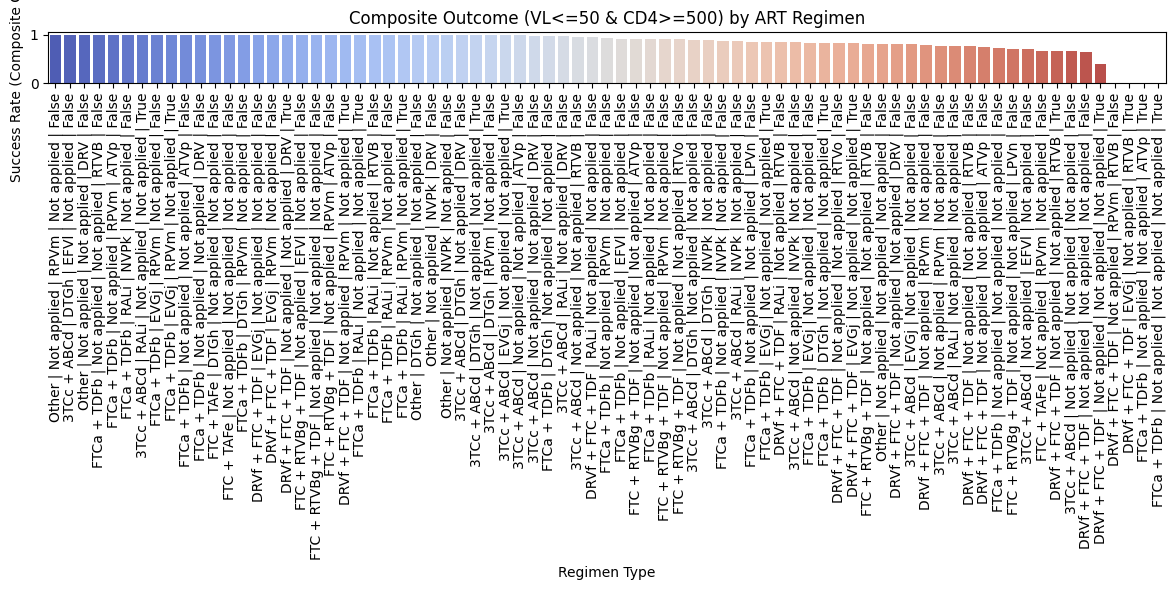

In [33]:
# Now, let's explore how the composite treatment success outcome varies across different ART regimens.
# We calculate the average success rate per regimen and plot it.

# Calculate the mean composite success (success rate) for each regimen.
regimen_success = summary.groupby('Regimen')['Composite_Success'].mean().sort_values(ascending=False)
print("Composite Success Rate by Regimen:")
print(regimen_success)

# Plot the composite success rate for each regimen.
plt.figure(figsize=(12, 6))
sns.barplot(x=regimen_success.index, y=regimen_success.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("Regimen Type")
plt.ylabel("Success Rate (Composite Outcome)")
plt.title("Composite Outcome (VL<=50 & CD4>=500) by ART Regimen")
plt.tight_layout()
plt.show()

In [34]:
# For our predictive model, we use baseline features to predict the composite success outcome.
# We choose features like Gender, Ethnic, and Regimen, and we will one-hot encode these categorical features.

from sklearn.preprocessing import OneHotEncoder

# Select the baseline features from our summary DataFrame.
features_df = summary[['Gender', 'Ethnic', 'Regimen']].copy()
target = summary['Composite_Success']

# Initialize the OneHotEncoder and transform our features.
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(features_df)

# Create a DataFrame with the encoded features for clarity.
encoded_feature_names = encoder.get_feature_names_out(features_df.columns)
X = pd.DataFrame(encoded_features, index=features_df.index, columns=encoded_feature_names)

# Print the first few rows of our engineered feature set.
print("Encoded Features:")
print(X.head())

Encoded Features:
                      Gender_Female  Gender_Male  Ethnic_Asian  Ethnic_Black  \
ID                                                                             
8130128040812561626             0.0          1.0           0.0           0.0   
74933345539280707               0.0          1.0           0.0           0.0   
13483877059260882472            0.0          1.0           0.0           0.0   
7612860914642638049             0.0          1.0           0.0           0.0   
3438669485137132520             0.0          1.0           0.0           0.0   

                      Ethnic_Other  Ethnic_White  \
ID                                                 
8130128040812561626            0.0           1.0   
74933345539280707              1.0           0.0   
13483877059260882472           0.0           1.0   
7612860914642638049            1.0           0.0   
3438669485137132520            1.0           0.0   

                      Regimen_3TCc + ABCd | DTGh | EFVl 

In [35]:
# Now we build our predictive model. We'll use LightGBM—a fast and efficient gradient boosting framework
# that supports GPU acceleration.
#
# We'll perform hyperparameter tuning using GridSearchCV to find the best parameters for our model.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import lightgbm as lgb

# Split the data into training and testing sets.
# We use stratification to ensure that both classes are represented proportionately in both sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.2, random_state=42, stratify=target
)

# Create a LightGBM classifier with GPU support.
# Note: 'device' parameter enables GPU acceleration. Kaggle typically provides NVIDIA Tesla T4.
lgb_clf = lgb.LGBMClassifier(
    device='gpu',         # Enable GPU support
    gpu_platform_id=0,    # Typically platform 0
    gpu_device_id=0,      # Typically device 0
    random_state=42
)

# Set up a grid of hyperparameters to search over.
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

# Use GridSearchCV for hyperparameter tuning with 3-fold cross-validation.
grid = GridSearchCV(
    lgb_clf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1
)
grid.fit(X_train, y_train)

# Print out the best parameters found by GridSearchCV.
print("Best parameters found:", grid.best_params_)

# Make predictions on the test set using the best estimator.
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)[:, 1]

# Evaluate our model using common metrics.
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 132382, number of negative: 17406
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 149788, number of used features: 67
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 2 dense feature groups (0.57 MB) transferred to GPU in 0.001061 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.883796 -> initscore=2.028877
[LightGBM] [Info] Start training from score 2.028877
Best parameters found: {'learning_rate': 0.1, 'n_estimators': 200, 'num_l

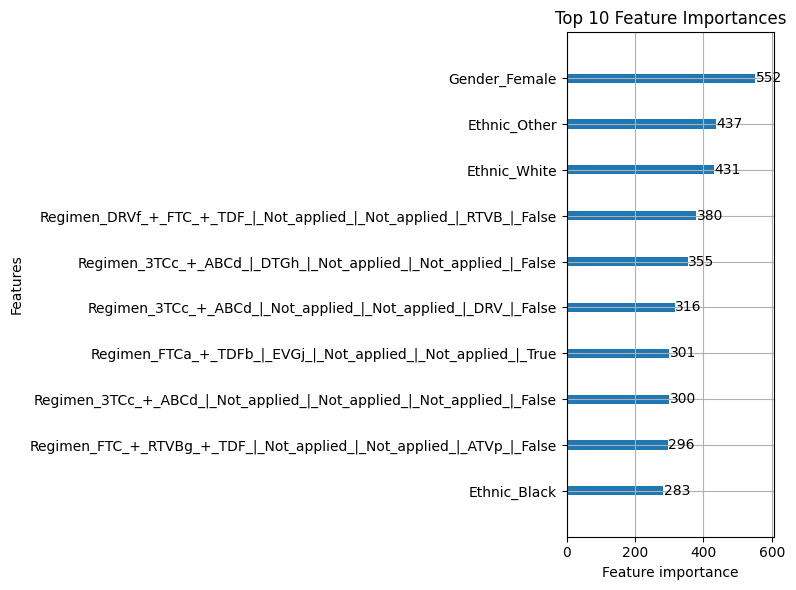

Feature Importances:
                                              feature  importance
0                                       Gender_Female         552
4                                        Ethnic_Other         437
5                                        Ethnic_White         431
34  Regimen_DRVf + FTC + TDF | Not applied | Not a...         380
9   Regimen_3TCc + ABCd | DTGh | Not applied | Not...         355
..                                                ...         ...
64  Regimen_FTCa + TDFb | Not applied | Not applie...           0
67  Regimen_FTCa + TDFb | Not applied | Not applie...           0
69  Regimen_FTCa + TDFb | Not applied | RPVm | ATV...           0
71  Regimen_FTCa + TDFb | RALi | NVPk | Not applie...           0
82  Regimen_Other | Not applied | RPVm | Not appli...           0

[83 rows x 2 columns]


In [36]:
# Here we visualize the feature importance from our best LightGBM model.
# This helps us understand which features (e.g., certain regimen categories) have the most influence on the outcome.
ax = lgb.plot_importance(grid.best_estimator_, max_num_features=10, figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

# We can also view the feature importance values in a DataFrame.
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': grid.best_estimator_.feature_importances_
}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(importance_df)

# Summary & Recommendations

**Data Processing:**
- We loaded the synthetic HIV dataset and mapped coded categorical variables to their actual names.
- A combined 'Regimen' column was created to uniquely identify each treatment combination.

**Exploratory Analysis:**
- We visualized the distribution of patients across different ART regimens.
- We also examined monthly trends in Viral Load (VL) and CD4 counts.

**Outcome Definition:**
- For each patient, we determined the first month when key outcomes were reached:
  - VL ≤ 250 copies/mL.
  - VL ≤ 50 copies/mL.
  - CD4 count ≥ 500 cells/mm³.
- A composite success outcome was defined as achieving both VL ≤ 50 and CD4 ≥ 500.

**Modeling:**
- Baseline features (Gender, Ethnic, Regimen) were one-hot encoded.
- A LightGBM classifier with GPU support was trained using GridSearchCV for hyperparameter tuning.
- The model was evaluated using accuracy, ROC-AUC, and a detailed classification report.